In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv("load_summary_Add_data.csv")

In [3]:
print("Shape of original dataset: ", df.shape)

Shape of original dataset:  (4018, 13)


In [4]:
df.head()

,Sno,day,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH)
0,1,6,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
1,2,7,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
2,3,1,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
3,4,2,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178
4,5,3,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178


In [5]:
print("Total sample in dataset: ",len(df))

Total sample in dataset:  4018


In [6]:
# checking null values
df.isnull().sum()

Sno                                     0
day                                     0
Date                                    0
Load                                    0
GDP Growth                              0
per capita GDP us dollar              103
Access to electricty(% population)    365
min temp c                              0
meantemp c                              0
max temp c                              0
precipitation(mm)                       0
No of consumer                          0
Total Availiability (GWH)               0
dtype: int64

In [7]:
# total nan values in dataframe
df.isnull().sum().sum()

468

In [8]:
#checkign the datatypes 
df.dtypes

Sno                                     int64
day                                     int64
Date                                   object
Load                                  float64
GDP Growth                            float64
per capita GDP us dollar              float64
Access to electricty(% population)    float64
min temp c                            float64
meantemp c                            float64
max temp c                            float64
precipitation(mm)                     float64
No of consumer                          int64
Total Availiability (GWH)               int64
dtype: object

In [9]:
columns = df.columns
columns

Index(['Sno', 'day', 'Date', 'Load', 'GDP Growth', 'per capita GDP us dollar',
       'Access to electricty(% population)', 'min temp c', 'meantemp c',
       'max temp c', 'precipitation(mm)', 'No of consumer',
       'Total Availiability (GWH)'],
      dtype='object')

In [10]:
print("No. of columns containing null values")
print(len(df.columns[df.isna().any()]))

print("No. of columns not containing null values")
print(len(df.columns[df.notna().all()]))

print("Total no. of columns in the dataframe")
print(len(df.columns))

No. of columns containing null values
2
No. of columns not containing null values
11
Total no. of columns in the dataframe
13


In [11]:
# Find out Columns that Have NaN values
col_having_nan_values=df.loc[:, df.isnull().any()].columns
print(col_having_nan_values)

Index(['per capita GDP us dollar', 'Access to electricty(% population)'], dtype='object')


In [12]:
# checking if load column contains 0 or less than 0 values
(df['Load'] <= 0).any()

True

In [13]:
# min and max value in load column
df['Load'].max(), df['Load'].min()

(1902.04, 0.0)

Text(0, 0.5, 'Load')

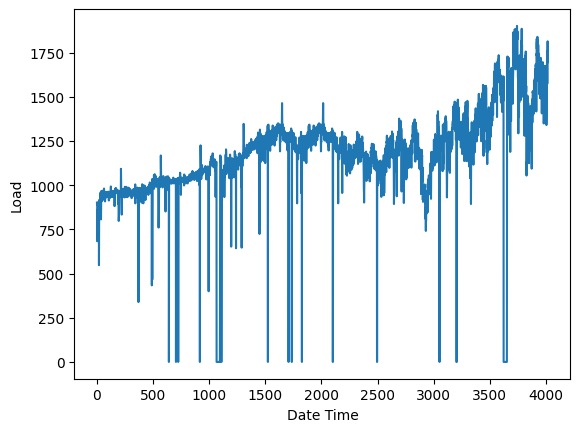

In [14]:
# plot load
df["Load"].plot()
plt.xlabel("Date Time")
plt.ylabel("Load")

# Interpolating load values for having lesss than 0

In [15]:
# Replace negative values with NaN for accurate interpolation
df['Load'] = df['Load'].apply(lambda x: x if x > 0 else pd.NA)
# Perform linear interpolation
df['Load'] = pd.to_numeric(df['Load'])  # Convert the column to numeric

In [16]:
df.isnull().any()

Sno                                   False
day                                   False
Date                                  False
Load                                   True
GDP Growth                            False
per capita GDP us dollar               True
Access to electricty(% population)     True
min temp c                            False
meantemp c                            False
max temp c                            False
precipitation(mm)                     False
No of consumer                        False
Total Availiability (GWH)             False
dtype: bool

In [17]:
df.isnull().sum()

Sno                                     0
day                                     0
Date                                    0
Load                                   82
GDP Growth                              0
per capita GDP us dollar              103
Access to electricty(% population)    365
min temp c                              0
meantemp c                              0
max temp c                              0
precipitation(mm)                       0
No of consumer                          0
Total Availiability (GWH)               0
dtype: int64

In [18]:
# Total nan values in entire dataframe
df.isnull().sum().sum()

550

In [19]:
# checking nan values in load column
df['Load'].isnull().sum()

82

In [20]:
# Find out Columns that Have NaN values
col_having_nan_values=df.loc[:, df.isnull().any()].columns
print(col_having_nan_values)

Index(['Load', 'per capita GDP us dollar',
       'Access to electricty(% population)'],
      dtype='object')


In [21]:
#  Perform linear interpolation for selected columns
for column in col_having_nan_values:
    df[column] = df[column].interpolate(method='linear')

In [22]:
# checking null values after interpolation
df.isnull().sum()

Sno                                   0
day                                   0
Date                                  0
Load                                  0
GDP Growth                            0
per capita GDP us dollar              0
Access to electricty(% population)    0
min temp c                            0
meantemp c                            0
max temp c                            0
precipitation(mm)                     0
No of consumer                        0
Total Availiability (GWH)             0
dtype: int64

In [23]:
# Drop sno and day
df = df.drop(columns=['Sno', 'day'])

# Convert 'timestamp' column to pandas datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day into separate columns
df['year'] = df['Date'].dt.year
df['month'] = df['Date'].dt.month
df['day'] = df['Date'].dt.day
df.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17


In [24]:
# Saving to csv file
df.to_csv("data_interpolated.csv", index=False)

In [25]:
data = pd.read_csv('data_interpolated.csv')
data.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17


# Visualization

Text(0, 0.5, 'Load')

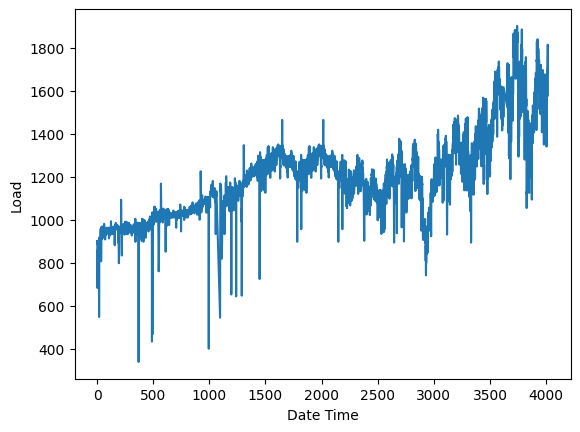

In [26]:
df_copy = df.copy(deep=True)
df_copy["Load"].plot()
plt.xlabel("Date Time")
plt.ylabel("Load")

In [27]:
df_copy.columns

Index(['Date', 'Load', 'GDP Growth', 'per capita GDP us dollar',
       'Access to electricty(% population)', 'min temp c', 'meantemp c',
       'max temp c', 'precipitation(mm)', 'No of consumer',
       'Total Availiability (GWH)', 'year', 'month', 'day'],
      dtype='object')

In [28]:
# new datframe with selected columns
selected_cols = df_copy.columns
df1 = df[selected_cols].copy()
df1.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17


<Axes: >

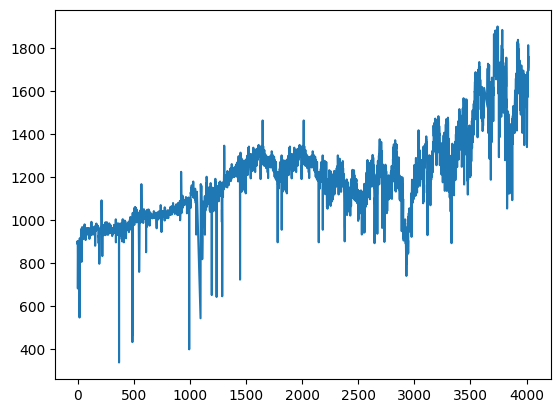

In [29]:
df1["Load"].plot()

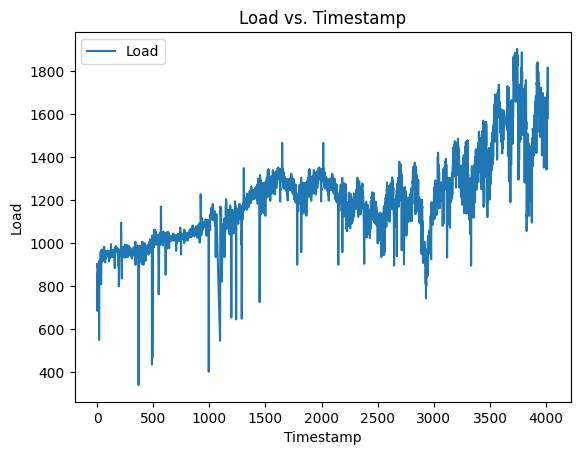

In [30]:
# plot plot with labeling
df1.plot(kind='line', y='Load')
plt.xlabel('Timestamp')
plt.ylabel('Load')
plt.title('Load vs. Timestamp')
plt.savefig("Load vs Timestame.png")
plt.show()

In [31]:
# Convert 'timestamp' column to pandas datetime format
df1['Date'] = pd.to_datetime(df1['Date'])

# Extract year, month, and day into separate columns
df1['year'] = df1['Date'].dt.year
df1['month'] = df1['Date'].dt.month
df1['day'] = df1['Date'].dt.day

# Define the seasons based on month ranges
def get_season(month):
    if month in [12, 1, 2]:  # Winter: December, January, February
        return 'Winter'
    elif month in [3, 4, 5]:  # Spring: March, April, May
        return 'Spring'
    elif month in [6, 7, 8]:  # Summer: June, July, August
        return 'Summer'
    else:  # Autumn/Fall: September, October, November
        return 'Autumn/Fall'

df1['season'] = df1['Date'].dt.month.apply(get_season)

df1.head()

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day,season
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13,Spring
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14,Spring
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15,Spring
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16,Spring
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17,Spring


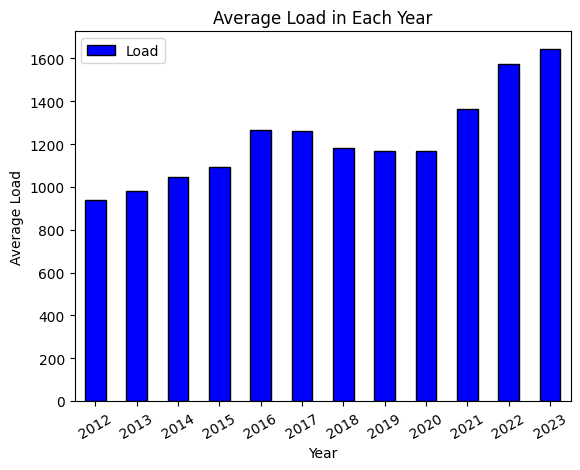

In [32]:
# plot of avearge load in each year
# Group the DataFrame by the 'year' column and calculate the average load for each year.

df1_yearly_avg = df1.groupby('year')['Load'].mean().reset_index()

# Plot the average load values for each year.

df1_yearly_avg.plot(kind='bar', x='year', y='Load', color='blue', edgecolor='black')
plt.xlabel('Year')
plt.ylabel('Average Load')
plt.title('Average Load in Each Year')
plt.xticks(rotation=30)
plt.show()

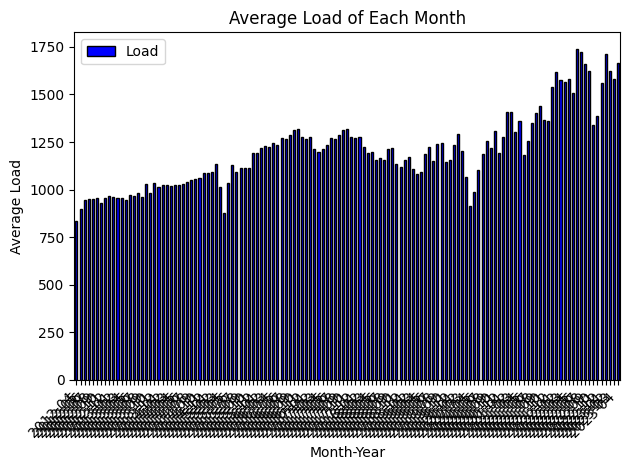

In [33]:
#plotting average load for each month

# Group the DataFrame by the 'year' and 'month' columns and calculate the average load for each month.
df1_monthly_avg = df1.groupby(['year', 'month'])['Load'].mean().reset_index()

#  Create a new 'month_year' column combining year and month for better plotting.
df1_monthly_avg['month_year'] = df1_monthly_avg['year'].astype(str) + '-' + df1_monthly_avg['month'].astype(str).str.zfill(2)

# # Plot the average load values for each month.

df1_monthly_avg.plot(kind='bar', x='month_year', y='Load', color='blue', edgecolor='black')
plt.xlabel('Month-Year')
plt.ylabel('Average Load')
plt.title('Average Load of Each Month')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# plotting average load for each month for 2-3 consecutive years

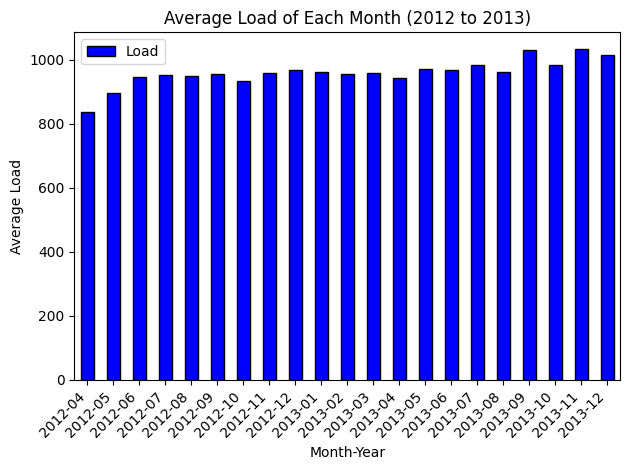

In [34]:

#  Filter the DataFrame for the specific range of years (2-3 years in this case).

start_year = 2012
end_year = 2013
df1_filtered = df1[(df1['year'] >= start_year) & (df1['year'] <= end_year)]
df1_monthly_avg = df1_filtered.groupby(['year', 'month'])['Load'].mean().reset_index()
df1_monthly_avg['month_year'] = df1_monthly_avg['year'].astype(str) + '-' + df1_monthly_avg['month'].astype(str).str.zfill(2)

df1_monthly_avg.plot(kind='bar', x='month_year', y='Load', color='blue', edgecolor='black')
plt.xlabel('Month-Year')
plt.ylabel('Average Load')
plt.title('Average Load of Each Month ({} to {})'.format(start_year, end_year))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

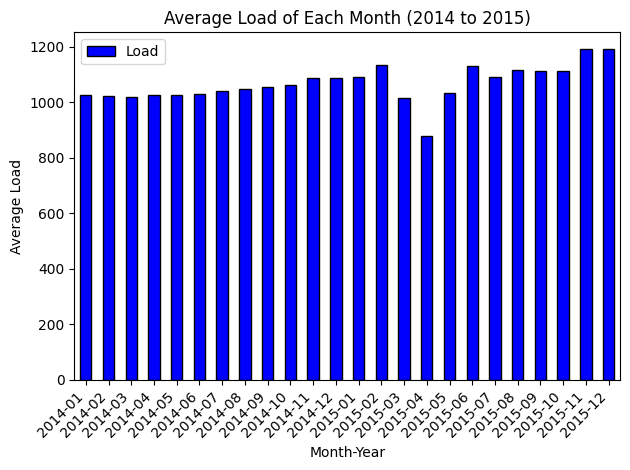

In [35]:
#  Filter the DataFrame for the specific range of years (2-3 years in this case).

start_year = 2014
end_year = 2015
df1_filtered = df1[(df1['year'] >= start_year) & (df1['year'] <= end_year)]
df1_monthly_avg = df1_filtered.groupby(['year', 'month'])['Load'].mean().reset_index()
df1_monthly_avg['month_year'] = df1_monthly_avg['year'].astype(str) + '-' + df1_monthly_avg['month'].astype(str).str.zfill(2)

df1_monthly_avg.plot(kind='bar', x='month_year', y='Load', color='blue', edgecolor='black')
plt.xlabel('Month-Year')
plt.ylabel('Average Load')
plt.title('Average Load of Each Month ({} to {})'.format(start_year, end_year))
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# plotting load for each month average for all years in pandas

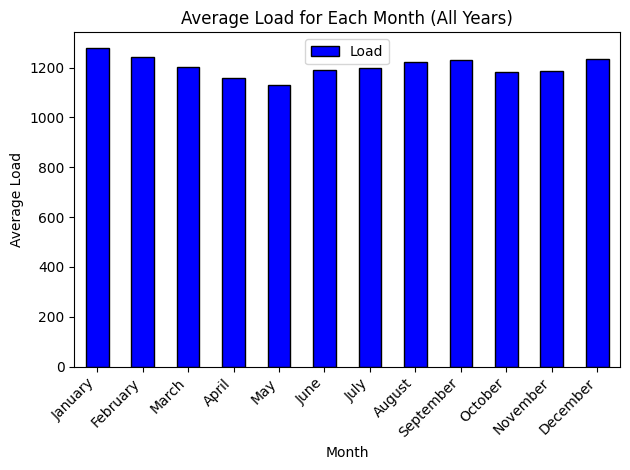

In [36]:
df1_monthly_avg = df1.groupby('month')['Load'].mean().reset_index()

# Create a new 'month_name' column to display month names instead of month numbers.
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
df1_monthly_avg['month_name'] = df1_monthly_avg['month'].apply(lambda x: month_names[x-1])

#  Plot the average load values for each month.

df1_monthly_avg.plot(kind='bar', x='month_name', y='Load', color='blue', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Average Load')
plt.title('Average Load for Each Month (All Years)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [37]:
df1_monthly_avg

,month,Load,month_name
0,1,1277.375024,January
1,2,1243.572893,February
2,3,1200.362987,March
3,4,1158.890724,April
4,5,1128.420654,May
5,6,1191.909643,June
6,7,1196.486367,July
7,8,1220.723288,August
8,9,1229.762494,September
9,10,1182.439381,October


# plot the load season wise

In [38]:
# Group the DataFrame by the 'season' column and calculate the average load for each season.
df1_season_avg = df1.groupby('season')['Load'].mean().reset_index()
df1_season_avg

,season,Load
0,Autumn/Fall,1199.044107
1,Spring,1162.569925
2,Summer,1203.167727
3,Winter,1251.596913


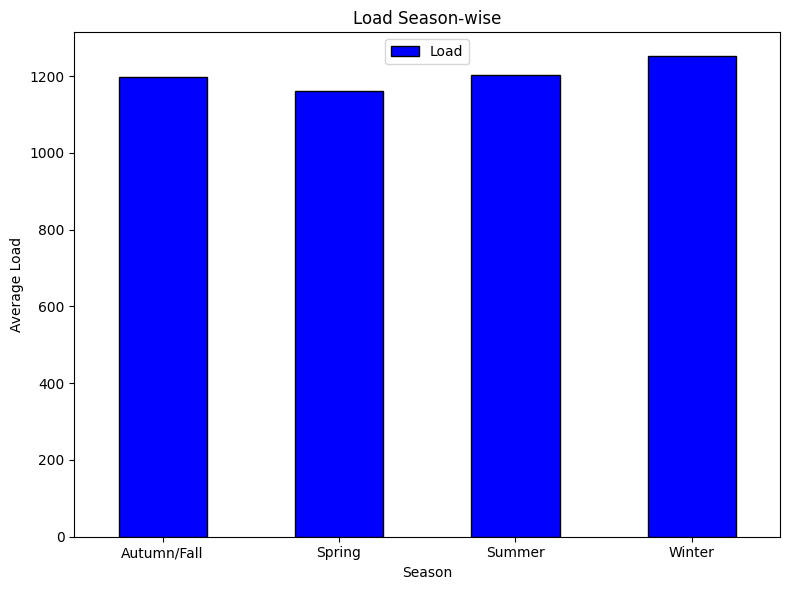

In [39]:
# Plot the load values for each season.
# plt.figure(figsize=(8, 6)),6
df1_season_avg.plot(kind='bar', x='season', y='Load', color='blue', edgecolor='black', figsize=(8,6))
plt.xlabel('Season')
plt.ylabel('Average Load')
plt.title('Load Season-wise')
plt.xticks(rotation=0)
plt.legend(loc='upper center')
plt.tight_layout()
plt.show()

# plot average week wise load

In [40]:
weekly_average_load = df1.groupby(df1['Date'].dt.isocalendar().week)['Load'].mean()
weekly_average_load

week
1     1278.444048
2     1284.833512
3     1272.661052
4     1274.655336
5     1266.784094
6     1261.561039
7     1243.953354
8     1227.058406
9     1204.715029
10    1207.184911
11    1225.631223
12    1210.461437
13    1179.300840
14    1183.324586
15    1146.633849
16    1143.182425
17    1155.073827
18    1100.329091
19    1121.539610
20    1121.057632
21    1141.433734
22    1158.007435
23    1184.602808
24    1187.850276
25    1209.187500
26    1200.335032
27    1211.175016
28    1194.724627
29    1187.521467
30    1190.159247
31    1207.497844
32    1212.801792
33    1234.789805
34    1216.639421
35    1225.319519
36    1239.948000
37    1229.143974
38    1230.323117
39    1221.048187
40    1187.271039
41    1192.713325
42    1175.358987
43    1163.473067
44    1182.343117
45    1166.484390
46    1192.597013
47    1195.384545
48    1201.806800
49    1204.117844
50    1225.240312
51    1244.639755
52    1262.944737
53    1302.106429
Name: Load, dtype: float64

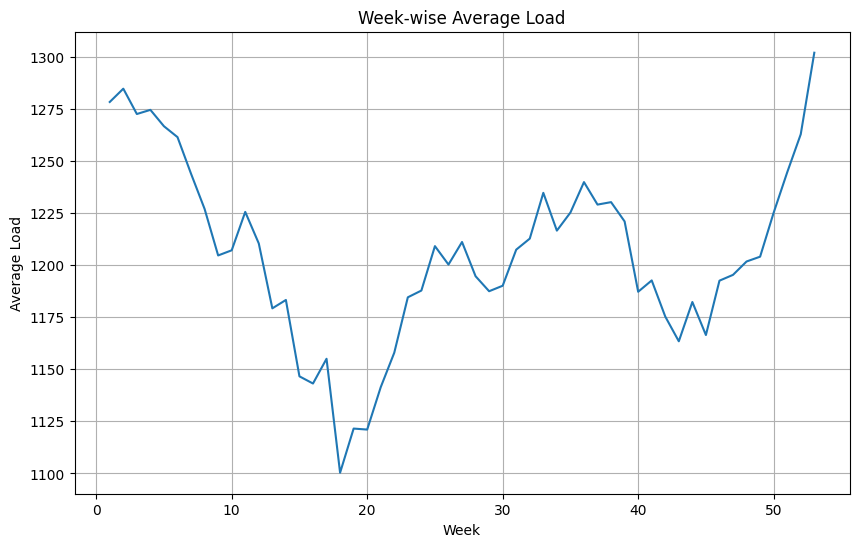

In [41]:
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size
plt.plot(weekly_average_load.index, weekly_average_load.values)
plt.xlabel('Week')
plt.ylabel('Average Load')
plt.title('Week-wise Average Load')
plt.grid(True)
plt.show()

# Average daywise load for year

In [42]:
df1['day_of_week'] = df1['Date'].dt.dayofweek
df1

,Date,Load,GDP Growth,per capita GDP us dollar,Access to electricty(% population),min temp c,meantemp c,max temp c,precipitation(mm),No of consumer,Total Availiability (GWH),year,month,day,season,day_of_week
0,2012-04-13,900.8,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,13,Spring,4
1,2012-04-14,889.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,14,Spring,5
2,2012-04-15,902.6,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,15,Spring,6
3,2012-04-16,683.0,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,16,Spring,0
4,2012-04-17,816.2,4.670142,794.092559,75.21,8.17,15.41,22.69,50.32,2324414,4178,2012,4,17,Spring,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4013,2023-04-09,1708.0,4.100000,1336.546047,0.00,8.17,15.41,22.69,50.32,0,0,2023,4,9,Spring,6
4014,2023-04-10,1709.0,4.100000,1336.546047,0.00,8.17,15.41,22.69,50.32,0,0,2023,4,10,Spring,0
4015,2023-04-11,1815.0,4.100000,1336.546047,0.00,8.17,15.41,22.69,50.32,0,0,2023,4,11,Spring,1
4016,2023-04-12,1696.0,4.100000,1336.546047,0.00,8.17,15.41,22.69,50.32,0,0,2023,4,12,Spring,2


In [43]:
average_load_per_day = df1.groupby(['year', 'day_of_week'])['Load'].mean().unstack()
average_load_per_day


day_of_week,0,1,2,3,4,5,6
year,,,,,,,
2012,938.962368,933.100811,942.968919,936.851351,938.655263,931.439474,938.123684
2013,976.990393,984.118522,983.433373,959.820994,983.436562,982.648854,985.519800
2014,1043.780577,1041.021731,1042.153019,1045.486923,1048.091731,1042.877885,1043.962308
2015,1097.804100,1094.064225,1103.606824,1096.546604,1088.053561,1064.372506,1093.559361
2016,1270.220339,1271.174190,1271.222887,1245.292959,1259.375800,1261.787453,1267.183937
2017,1262.523077,1269.280385,1267.381538,1257.743750,1266.673846,1246.369231,1266.489623
2018,1189.166038,1193.775192,1191.672308,1189.394808,1184.525192,1148.057673,1186.979404
2019,1180.465641,1174.623447,1172.451538,1184.564423,1172.318654,1123.478462,1180.083269
2020,1164.205885,1169.700120,1157.659649,1178.297922,1168.199020,1151.159640,1172.482939


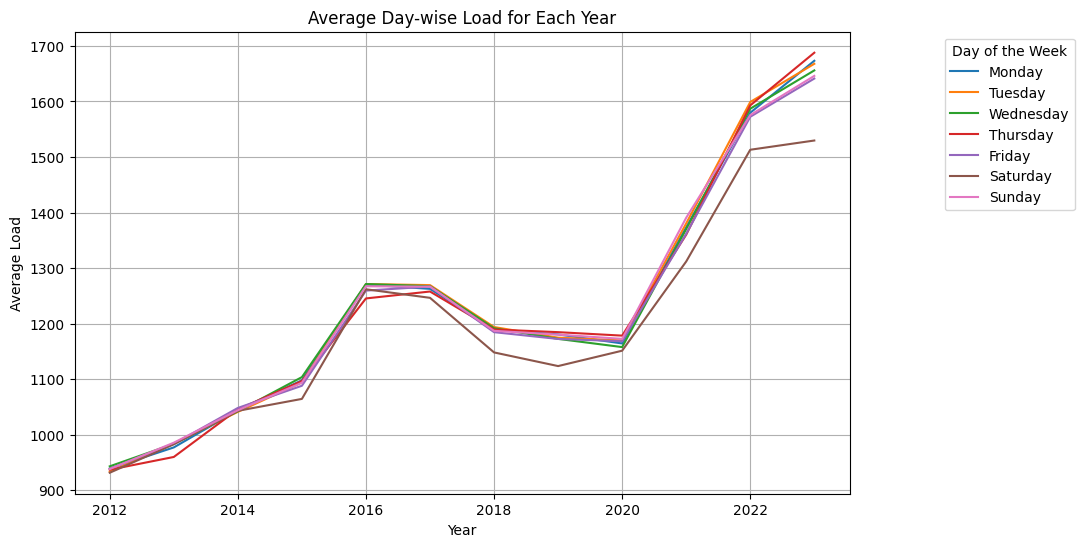

In [44]:
# create a plot
plt.figure(figsize=(10, 6))  # Optional: Adjust the figure size

# Define day names for the x-axis ticks
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Plot each day of the week as a separate line
for day in range(7):
    plt.plot(average_load_per_day.index, average_load_per_day[day], label=day_names[day])

plt.xlabel('Year')
plt.ylabel('Average Load')
plt.title('Average Day-wise Load for Each Year')
plt.legend(title='Day of the Week', loc='upper right', bbox_to_anchor=(1.3, 1))
plt.grid(True)
plt.show()

# box plot of load for each year

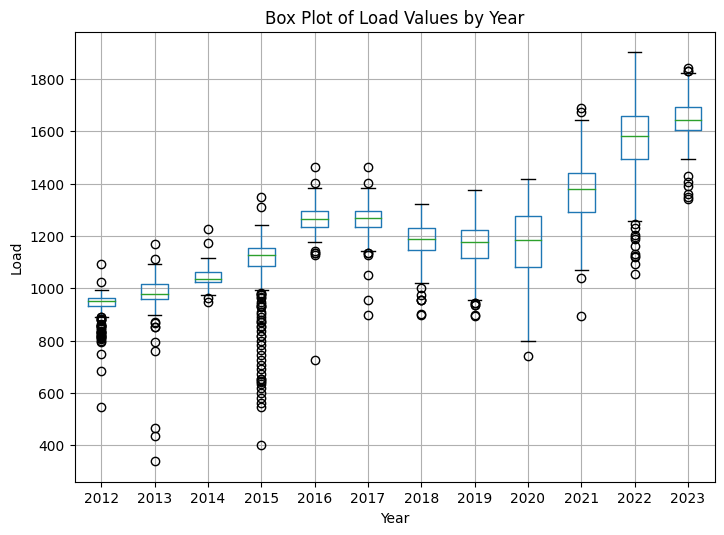

In [45]:
df1.boxplot(column='Load', by='year', figsize=(8, 6))
plt.xlabel('Year')
plt.ylabel('Load')
plt.title('Box Plot of Load Values by Year')
plt.suptitle('')  # Remove the default title added by pandas
plt.show()

# Box plot for monthly load

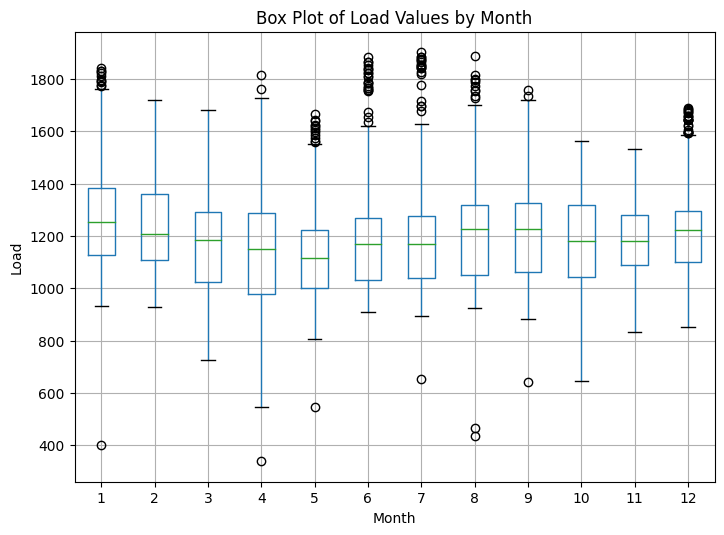

In [46]:
df1.boxplot(column='Load', by='month', figsize=(8, 6))
plt.xlabel('Month')
plt.ylabel('Load')
plt.title('Box Plot of Load Values by Month')
plt.suptitle('')  # Remove the default title added by pandas
plt.show()

# Box plot daily basis

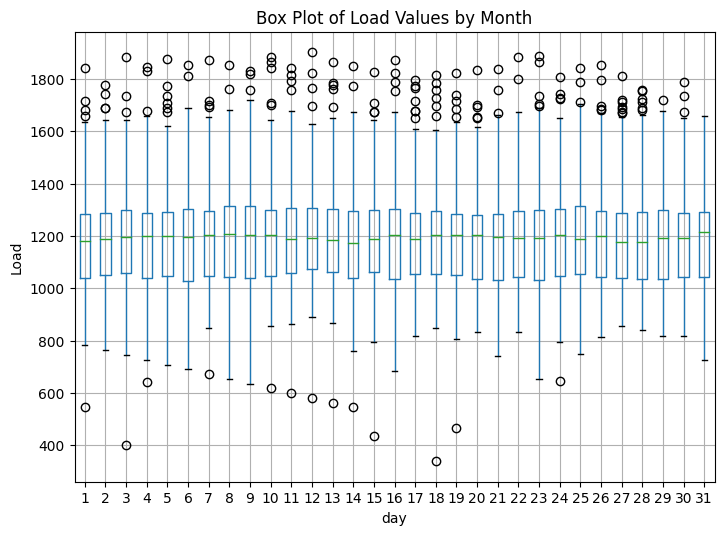

In [47]:
df1.boxplot(column='Load', by='day', figsize=(8, 6))
plt.xlabel('day')
plt.ylabel('Load')
plt.title('Box Plot of Load Values by Month')
plt.suptitle('')  # Remove the default title added by pandas
plt.show()

In [48]:
average_load_per_day = df1.groupby(['day_of_week', 'year'])['Load'].mean().unstack()
average_load_per_day

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
day_of_week,,,,,,,,,,,,
0,938.962368,976.990393,1043.780577,1097.804100,1270.220339,1262.523077,1189.166038,1180.465641,1164.205885,1373.477037,1579.662928,1673.200000
1,933.100811,984.118522,1041.021731,1094.064225,1271.174190,1269.280385,1193.775192,1174.623447,1169.700120,1380.353585,1599.002066,1667.800000
2,942.968919,983.433373,1042.153019,1103.606824,1271.222887,1267.381538,1191.672308,1172.451538,1157.659649,1370.178704,1586.905434,1655.866667
3,936.851351,959.820994,1045.486923,1096.546604,1245.292959,1257.743750,1189.394808,1184.564423,1178.297922,1360.080727,1592.896880,1687.733333
4,938.655263,983.436562,1048.091731,1088.053561,1259.375800,1266.673846,1184.525192,1172.318654,1168.199020,1361.620182,1572.393151,1641.214286
5,931.439474,982.648854,1042.877885,1064.372506,1261.787453,1246.369231,1148.057673,1123.478462,1151.159640,1311.808868,1513.016981,1529.642857
6,938.123684,985.519800,1043.962308,1093.559361,1267.183937,1266.489623,1186.979404,1180.083269,1172.482939,1390.592660,1575.467618,1646.000000


In [49]:
average_load_per_month = df1.groupby(['month', 'year'])['Load'].mean().unstack()
average_load_per_month

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
month,,,,,,,,,,,,
1,NaN,959.881358,1025.732581,1091.806129,1220.687458,1278.712903,1278.248387,1170.422581,1292.115161,1407.202069,1619.757097,1714.935484
2,NaN,953.749449,1021.835714,1132.573214,1230.825399,1213.964286,1222.196429,1107.455000,1203.824138,1406.126538,1574.844643,1625.392857
3,NaN,957.565040,1018.670968,1014.918626,1226.085262,1196.159032,1190.300968,1084.450000,1064.187742,1304.942258,1564.745224,1581.967742
4,837.677778,943.141500,1026.278333,877.624086,1247.337022,1213.264167,1198.906667,1092.822333,912.304333,1360.601739,1582.761602,1664.307692
5,895.983871,969.285242,1025.483871,1033.035484,1232.933871,1232.935484,1153.287097,1187.577097,985.038667,1183.201290,1509.240000,NaN
6,946.656667,968.284250,1028.870000,1131.660000,1273.612167,1273.103000,1164.636667,1225.150000,1101.774483,1254.640667,1739.613667,NaN
7,950.792258,981.556210,1038.569677,1091.480645,1267.470968,1267.470968,1156.087097,1148.341935,1186.884000,1349.946452,1722.130323,NaN
8,949.883871,960.551613,1048.045161,1115.177419,1289.612903,1289.612903,1212.219355,1240.757419,1257.157567,1404.726161,1661.387097,NaN
9,955.886667,1028.366667,1056.203000,1113.683333,1311.626333,1311.626333,1218.410000,1244.849000,1220.232071,1441.768667,1624.100000,NaN


In [50]:
average_load_per_season = df1.groupby(['season', 'year'])['Load'].mean().unstack()
average_load_per_season

year,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
season,,,,,,,,,,,,
Autumn/Fall,948.554176,1014.063736,1067.772527,1138.460659,1302.693846,1303.676264,1156.854945,1180.058527,1240.903176,1389.591868,1449.615385,NaN
Spring,874.565306,956.810910,1023.447283,976.253261,1235.322867,1214.128859,1180.635109,1121.929457,988.023187,1293.704907,1551.917283,1606.295455
Summer,949.137609,970.150761,1038.599565,1112.567391,1276.934402,1276.768370,1177.789130,1204.528043,1182.793443,1337.326859,1707.363587,NaN
Winter,967.037419,977.046741,1046.111111,1138.905556,1240.151075,1255.171111,1218.733422,1172.560556,1258.584901,1453.836279,1586.112444,1672.440678


In [51]:
average_load_per_season.columns

Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023], dtype='int32', name='year')

In [52]:
average_load_per_season.index

Index(['Autumn/Fall', 'Spring', 'Summer', 'Winter'], dtype='object', name='season')

In [53]:
average_load_per_season = df1.groupby(['year', 'season'])['Load'].mean().unstack()
average_load_per_season

season,Autumn/Fall,Spring,Summer,Winter
year,,,,
2012,948.554176,874.565306,949.137609,967.037419
2013,1014.063736,956.810910,970.150761,977.046741
2014,1067.772527,1023.447283,1038.599565,1046.111111
2015,1138.460659,976.253261,1112.567391,1138.905556
2016,1302.693846,1235.322867,1276.934402,1240.151075
2017,1303.676264,1214.128859,1276.768370,1255.171111
2018,1156.854945,1180.635109,1177.789130,1218.733422
2019,1180.058527,1121.929457,1204.528043,1172.560556
2020,1240.903176,988.023187,1182.793443,1258.584901


In [54]:
# Delete the last row
average_load_per_season = average_load_per_season.drop(average_load_per_season.index[-1])
average_load_per_season

season,Autumn/Fall,Spring,Summer,Winter
year,,,,
2012,948.554176,874.565306,949.137609,967.037419
2013,1014.063736,956.810910,970.150761,977.046741
2014,1067.772527,1023.447283,1038.599565,1046.111111
2015,1138.460659,976.253261,1112.567391,1138.905556
2016,1302.693846,1235.322867,1276.934402,1240.151075
2017,1303.676264,1214.128859,1276.768370,1255.171111
2018,1156.854945,1180.635109,1177.789130,1218.733422
2019,1180.058527,1121.929457,1204.528043,1172.560556
2020,1240.903176,988.023187,1182.793443,1258.584901


In [55]:
average_load_per_season.index

Index([2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype='int32', name='year')

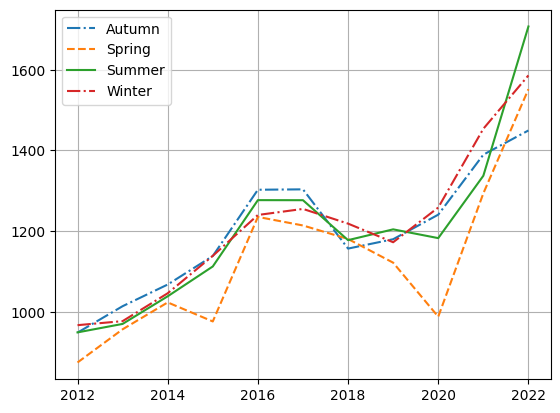

In [56]:
plt.plot(average_load_per_season['Autumn/Fall'], label='Autumn', linestyle='-.')
plt.plot(average_load_per_season['Spring'], label='Spring', linestyle='--')
plt.plot(average_load_per_season['Summer'], label='Summer', linestyle='-')
plt.plot(average_load_per_season['Winter'], label='Winter', linestyle='-.')
plt.grid(True)
plt.legend()
plt.show()

In [57]:
# Plot GDP
average_gdp_per_year = df1.groupby(['year'])['GDP Growth'].mean()
average_gdp_per_year

year
2012    4.670142
2013    3.525153
2014    6.011483
2015    3.976053
2016    0.433114
2017    8.977279
2018    7.619731
2019    6.657055
2020   -2.369621
2021    4.838150
2022    5.613193
2023    4.100000
Name: GDP Growth, dtype: float64

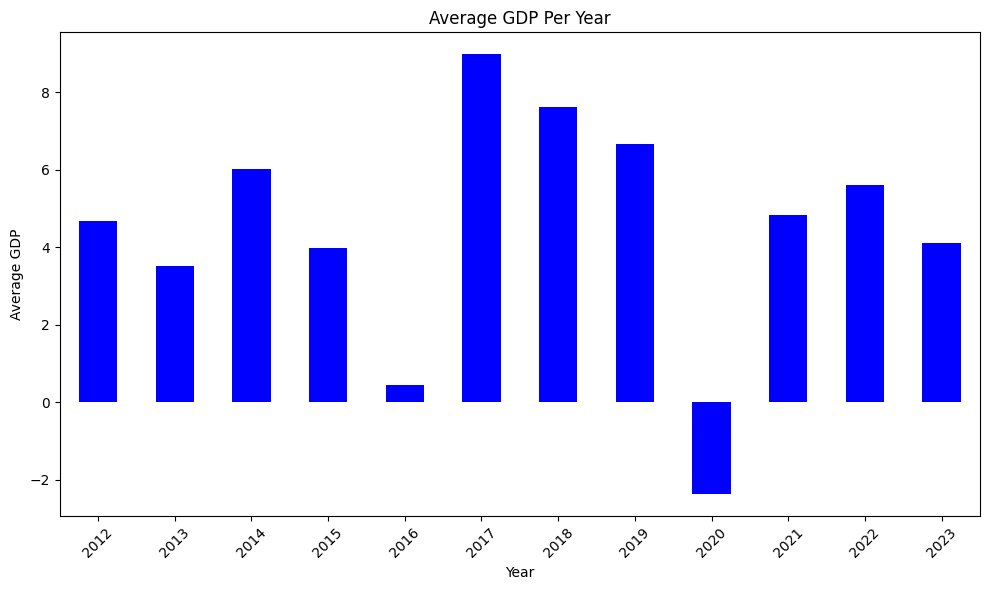

In [58]:
# Plot the average GDP per year
plt.figure(figsize=(10, 6))
average_gdp_per_year.plot(kind='bar', color='blue')
plt.title('Average GDP Per Year')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [59]:
df1['GDP Growth']

0       4.670142
1       4.670142
2       4.670142
3       4.670142
4       4.670142
          ...   
4013    4.100000
4014    4.100000
4015    4.100000
4016    4.100000
4017    4.100000
Name: GDP Growth, Length: 4018, dtype: float64

In [60]:
# Plot GDP
average_gdp_capital_per_year = df1.groupby(['year'])['per capita GDP us dollar'].mean()
average_gdp_capital_per_year


year
2012     794.092559
2013     809.384458
2014     827.744705
2015     882.307663
2016     880.224894
2017    1027.965474
2018    1161.534350
2019    1185.682318
2020    1139.189892
2021    1229.394205
2022    1336.546047
2023    1336.546047
Name: per capita GDP us dollar, dtype: float64

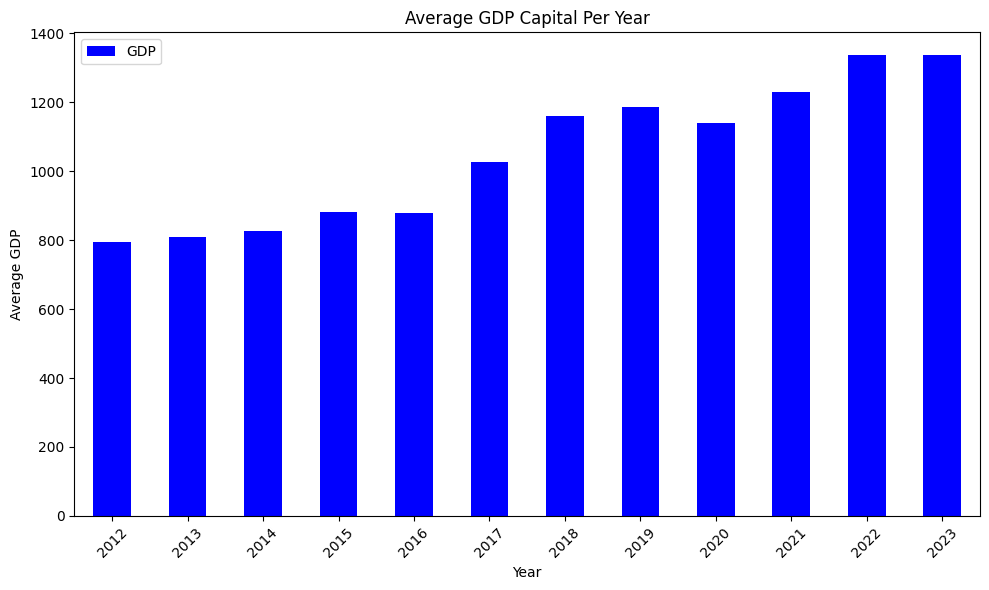

In [63]:
# Plot the average GDP capital per year
plt.figure(figsize=(10, 6))
average_gdp_capital_per_year.plot(kind='bar', color='blue', label='GDP')
# average_gdp_capital_per_year.plot(kind='line',  marker='o', color='green', linestyle='dashed', linewidth=2, markersize=8, label='Trend')
plt.title('Average GDP Capital Per Year')
plt.xlabel('Year')
plt.ylabel('Average GDP')
plt.xticks(rotation=45)
plt.legend()
# plt.grid(True)
plt.tight_layout()
plt.show()